In [ ]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np

# Load CSV file
csv_path = r"C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\fishnet open image\foid_labels_v100.csv"
data = pd.read_csv(csv_path)

# Set the path to images folder
image_dir = r"C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\fishnet open image\images"

# Create image paths
data['image_path'] = data['img_id'].apply(lambda x: os.path.join(image_dir, f"{x}.jpg"))

# Define the labels (you can choose either 'label_l1' or 'label_l2')
labels = data['label_l1'].values

# Load images as arrays
def load_image(image_path):
    img = load_img(image_path, target_size=(150, 150))  # Resize the image
    img_array = img_to_array(img)  # Convert image to array
    return img_array

# Load all images
images = np.array([load_image(img_path) for img_path in data['image_path']])

# Normalize the images
images = images / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training images: {X_train.shape[0]}")
print(f"Testing images: {X_test.shape[0]}")

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment the training data
datagen.fit(X_train)



In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to integer labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Optionally, convert labels to one-hot encoding if needed:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of y_train: (20088, 16)
Shape of y_test: (5023, 16)


In [7]:
# Build CNN Model
def build_cnn(num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Adjust the output layer based on the number of classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Get the number of unique classes
num_classes = len(label_encoder.classes_)

cnn_model = build_cnn(num_classes)
cnn_model.summary()


c:\Users\Dilfina\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73984)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,735,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,792,400 (18.28 MB)

 Trainable params: 4,792,400 (18.28 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 296s 470ms/step - accuracy: 0.2833 - loss: 2.1798 - val_accuracy: 0.4450 - val_loss: 152.0517
Epoch 2/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 275s 436ms/step - accuracy: 0.4286 - loss: 1.9032 - val_accuracy: 0.2781 - val_loss: 232.4075
Epoch 3/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 241s 381ms/step - accuracy: 0.4569 - loss: 1.7878 - val_accuracy: 0.2855 - val_loss: 510.3586
Epoch 4/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 241s 383ms/step - accuracy: 0.4585 - loss: 1.7499 - val_accuracy: 0.2877 - val_loss: 871.1813
Epoch 5/5
628/628 ━━━━━━━━━━━━━━━━━━━━ 232s 368ms/step - accuracy: 0.4735 - loss: 1.6788 - val_accuracy: 0.2616 - val_loss: 850.7684


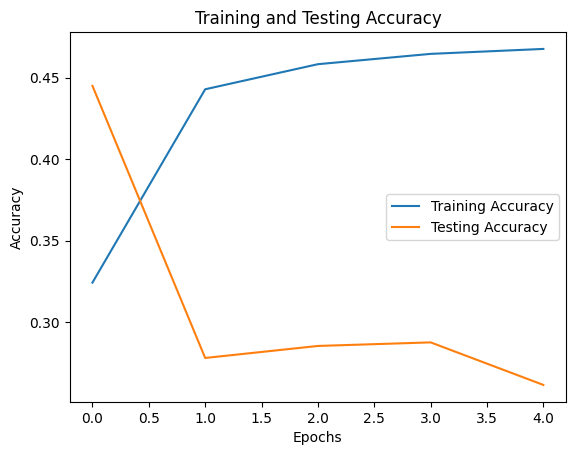

In [11]:
import matplotlib.pyplot as plt

# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()